In [22]:
from warnings import filterwarnings
filterwarnings('ignore')

In [23]:
import pandas as pd

In [24]:
A = pd.read_csv('C:/Bhushan data/ETLHIVE (India@123)/ETLHIVE Deep Learning/07_Text Processing_17-June-23/Restaurant_Reviews.tsv',sep='\t')

In [25]:
B = pd.read_csv('C:/Bhushan data/ETLHIVE (India@123)/ETLHIVE Deep Learning/07_Text Processing_17-June-23/rest_reviews_testing.csv')

In [26]:
A.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [27]:
B.head()

,Review
0,Tasty and delicious
1,crust is hard
2,yummy....I like Dominos pizza
3,fast service and good taste
4,Good taste


In [28]:
from re import sub

In [29]:
q = []
for i in A.Review:
    i = sub('[^a-zA-Z0-9 ]','',i)
    q.append(i.upper())

In [31]:
p = []
for i in B.Review:
    i = sub('[^a-zA-Z0-9 ]','',i)
    p.append(i.upper())

In [30]:
q

['WOW LOVED THIS PLACE',
 'CRUST IS NOT GOOD',
 'NOT TASTY AND THE TEXTURE WAS JUST NASTY',
 'STOPPED BY DURING THE LATE MAY BANK HOLIDAY OFF RICK STEVE RECOMMENDATION AND LOVED IT',
 'THE SELECTION ON THE MENU WAS GREAT AND SO WERE THE PRICES',
 'NOW I AM GETTING ANGRY AND I WANT MY DAMN PHO',
 'HONESLTY IT DIDNT TASTE THAT FRESH',
 'THE POTATOES WERE LIKE RUBBER AND YOU COULD TELL THEY HAD BEEN MADE UP AHEAD OF TIME BEING KEPT UNDER A WARMER',
 'THE FRIES WERE GREAT TOO',
 'A GREAT TOUCH',
 'SERVICE WAS VERY PROMPT',
 'WOULD NOT GO BACK',
 'THE CASHIER HAD NO CARE WHAT SO EVER ON WHAT I HAD TO SAY IT STILL ENDED UP BEING WAYYY OVERPRICED',
 'I TRIED THE CAPE COD RAVOLI CHICKEN WITH CRANBERRYMMMM',
 'I WAS DISGUSTED BECAUSE I WAS PRETTY SURE THAT WAS HUMAN HAIR',
 'I WAS SHOCKED BECAUSE NO SIGNS INDICATE CASH ONLY',
 'HIGHLY RECOMMENDED',
 'WAITRESS WAS A LITTLE SLOW IN SERVICE',
 'THIS PLACE IS NOT WORTH YOUR TIME LET ALONE VEGAS',
 'DID NOT LIKE AT ALL',
 'THE BURRITTOS BLAH',
 'THE

In [32]:
p

['TASTY AND DELICIOUS',
 'CRUST IS HARD',
 'YUMMYI LIKE DOMINOS PIZZA',
 'FAST SERVICE AND GOOD TASTE',
 'GOOD TASTE ',
 'ITS VERY DELICIOUS HOPE IT WILL MAINTAIN TAST',
 'FOOD WAS OKAY BUT THE CHEESY DIP PROVIDED WAS EXPIRED',
 'TASTE IS OK BUT NOT SATISFIED',
 'POOR SERVICE ',
 'GOOD HYGIENE FOOD DELIVERED BY DOMINOS WITH PROPER SAFETY',
 'NOT GOOD',
 'TASTE IS NOT OK ALSO SERVICE IS NOT SATISFIED',
 'DELAYED SERVICE',
 'HORRIBLE TASTE',
 'LATE SERVICE',
 'TASTE IS OK BUT DELIVERY IS TOO LATECANT SPEND THAT MUCH TIME',
 'DISAPPOINTING FOOD EXPERIENCE']

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv= TfidfVectorizer()

In [36]:
Xnew = tv.fit_transform(q).toarray()
Xnew_ts = tv.transform(p).toarray()

In [37]:
Xnew

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
Xnew_ts

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
Y = A.Liked
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

Model

In [46]:
from keras.models import Sequential
from keras .layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [47]:
nn = Sequential()
es = EarlyStopping(patience=10)

nn.add(Dense(units=1000,input_dim=(len(tv.get_feature_names()))))

nn.add(Dense(units=500))
nn.add(Dropout(rate=0.2))

nn.add(Dense(units=500))
nn.add(Dropout(rate=0.2))

nn.add(Dense(units=1,activation='sigmoid'))

In [48]:
nn.compile(loss='binary_crossentropy',metrics='accuracy')
model = nn.fit(Xnew,Y,epochs=30, validation_split=0.2,callbacks=es)

Epoch 1/30
25/25 [==============================] - 1s 39ms/step - loss: 0.5548 - accuracy: 0.6862 - val_loss: 0.5932 - val_accuracy: 0.6550
Epoch 2/30
25/25 [==============================] - 1s 34ms/step - loss: 0.1320 - accuracy: 0.9475 - val_loss: 0.7729 - val_accuracy: 0.7200
Epoch 3/30
25/25 [==============================] - 1s 34ms/step - loss: 0.0214 - accuracy: 0.9912 - val_loss: 0.6159 - val_accuracy: 0.8300
Epoch 4/30
25/25 [==============================] - 1s 34ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.5731 - val_accuracy: 0.6750
Epoch 5/30
25/25 [==============================] - 1s 34ms/step - loss: 2.2190e-04 - accuracy: 1.0000 - val_loss: 1.4834 - val_accuracy: 0.7100
Epoch 6/30
25/25 [==============================] - 1s 34ms/step - loss: 3.6386e-05 - accuracy: 1.0000 - val_loss: 1.0889 - val_accuracy: 0.8100
Epoch 7/30
25/25 [==============================] - 1s 35ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.7803 - val_accuracy: 0.8100
Epoch

In [49]:
tr_acc = model.history['accuracy']
ts_acc = model.history['val_accuracy']

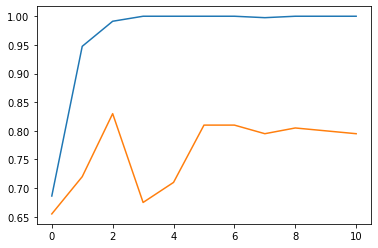

In [50]:
import matplotlib.pyplot as plt
plt.plot(tr_acc)
plt.plot(ts_acc)

In [54]:
output = nn.predict(Xnew_ts)

1/1 [==============================] - 0s 21ms/step


In [53]:
predictions = []

In [61]:
for i in output:
    if i>0.5:
        predictions.append(1)
    else:
        predictions.append(0)

In [62]:
predictions

[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [65]:
results = B[['Review']]

In [67]:
results['Likes'] = predictions

In [68]:
results

,Review,Likes
0,Tasty and delicious,1
1,crust is hard,0
2,yummy....I like Dominos pizza,1
3,fast service and good taste,1
4,Good taste,1
5,Its very delicious... hope it will maintain ta...,1
6,Food was okay but the cheesy dip provided was ...,0
7,taste is ok but not satisfied,0
8,Poor service,0
9,Good hygiene food delivered by dominos with pr...,1


TypeError: confusion_matrix() missing 2 required positional arguments: 'y_true' and 'y_pred'